<a href="https://colab.research.google.com/github/govldbstj/DeepLearning_from_Scratch_1/blob/main/01_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

##**신경망**
* 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것</br>
*손실 함수 : 신경망이 학습할 수 있도록 해주는 지표</br>-> 손실함수 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표</br>경사하강법 이용</br>
*데이터에서 학습한다 : 가중치 매개변수값을 데이터를 보고 자동으로 결정한다</br>-> 숨은 규칙성(특징)을 찾는다.</br>
특징(feature) 추출 = 패턴 학습</br>
* 데이터 : 훈련데이터(training data)와 시험데이터(test data)</br>
* 범용 능력 : 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력</br>
* 오버피팅 : 하나의 데이터셋에서만 지나치게 최적화된 상태


###**손실 함수**
신경망 성능의 '나쁨'을 나타내는 지표

####평균 제곱 오차 MSE
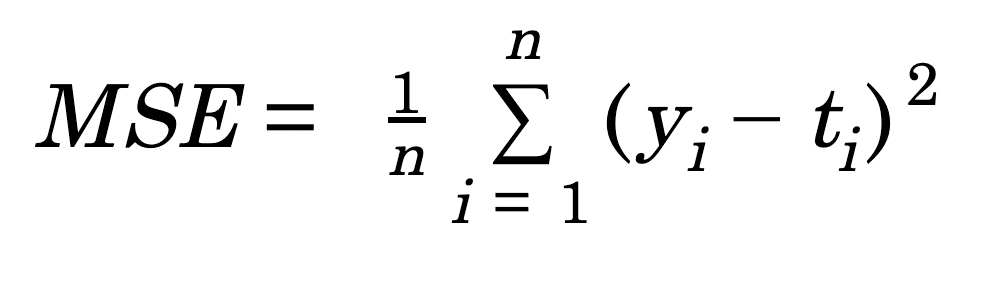

In [9]:
def mean_squared_error(y, t):
  return 0.5*np.sum((y-t)**2)

In [10]:
t = [0,0,1,0,0,0,0,0,0,0] #정답 2
y_correct = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #2일 확률이 가장 크다고 추정
y_wrong = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #2가 아닌 7일 확률이 가장 크다고 추정

print("correct: ", mean_squared_error(np.array(y_correct), np.array(t)))
print("wrong: ", mean_squared_error(np.array(y_wrong), np.array(t)))

correct:  0.09750000000000003
wrong:  0.5975


####교차 엔트로피 오차 CEE
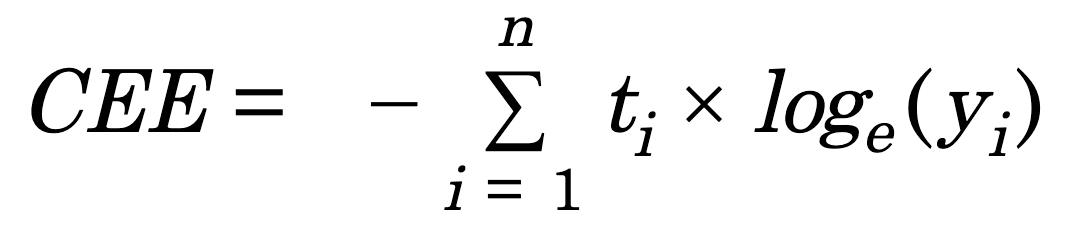
</br>평균 손실 함수 구하기: 교차엔트로피오차를 n개의 데이터셋에 대해 구하면</br>(1) 오차를 0~n까지 구해서</br>(2) 평균을 낸다.

In [11]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta)) #언더플로우 방지를 위해 아주 작은 값인 델타를 더함

In [12]:
t = [0,0,1,0,0,0,0,0,0,0] #정답 2
y_correct = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #2일 확률이 가장 크다고 추정
y_wrong = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #2가 아닌 7일 확률이 가장 크다고 추정

print("correct: ", cross_entropy_error(np.array(y_correct), np.array(t)))
print("wrong: ", cross_entropy_error(np.array(y_wrong), np.array(t)))

correct:  0.510825457099338
wrong:  2.302584092994546


####미니배치 학습
미니배치(mini-batch): 전체 데이터 중 일부(batch)를 추려 학습에 활용하는 방식.</br>MNIST 데이터셋의 경우 훈련 데이터가 6만개인데, 이 중 미니배치를 100장으로 무작위 선택하여 손실함수로 오차를 측정.

In [13]:
from mnist import load_mnist

In [14]:
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [15]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [16]:
np.random.choice(60000, 10) #무작위 index 10개 추출

array([ 3766, 17618, 32050,  9116,  6380, 31655, 38528,  3424,   724,
       30449])

#####배치용 교차 엔트로피 오차 구현
원핫인코딩 -> 정답 레이블에 대해서만 return하도록 되어 있음</br>
아닌 경우는 직접 정답 레이블에 해당하는 신경망의 출력을 선별해야 함</br>
return 하는 부분에서의 차이점

In [17]:
#원핫인코딩 용
def cross_entropy_error_for_onehot(y, t): #y: 신경망 output, t: 정답 레이블
  if y.ndim == 1: #데이터 하나에 대한 교차 엔트로피 오차를 구하는 경우
    print(t)
    t = t.reshape(1, t.size)
    print(t)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t*np.log(y))/batch_size

In [18]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t]))/batch_size 

#####**손실함수를 설정하는 이유**
높은 정확도를 만들어내기 위함.</br>
최적의 매개변수를 탐색할 때 손실함수의 값이 최대한 작게 하는 매개변수를 찾아야 한다.</br>
이때 매개변수의 미분(기울기)값을 이용해 매개변수를 갱신한다.</br>
미분값이 음수이면 가중치 매개변수 방향을 양의 방향으로 변화시킨다.</br>
양수일 때는 음의 방향으로 변화시키고, 이 과정을 반복해 미분값이 0이 되는 지점을 찾는다.</br>
-> 정확도를 매개변수 갱신에 활용하지 않는 이유는 기울기를 활용해서 갱신할 수 없기 때문이다.</br>
-> 마찬가지로, 계단함수가 아닌 시그모이드 함수를 사용하는 것도 같은 이유에서이다.


####**수치 미분**
경사하강법 : 기울기 값으로 나아갈 방향을 결정한다.

In [19]:
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h)-f(x))/h

위 함수에서는 개선할 부분이 두가지 있다.</br>1. h값이 너무 작아서 발생하는 오류 -> h를 1e-4로 변경</br>2. h값을 무한히 0으로 수렴시키는 것이 불가능해서 생기는 오류 -> 전방차분만 구하는 것이 아니라 후방차분까지 구해 평균을 낸다 (중앙 차분 구하기)</br></br>해석적 미분 : 수학시간에 배우는 h가 0에 수렴한다는 가정 하에 미분하는 것</br>수치 미분 : 미분을 근사치로 계산하는 방법으로, 여기에서 사용한 방법.

In [20]:
# 개선 후
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h)-f(x-h))/(2*h)

In [21]:
# y = 0.01x^2 + 0.1x 미분해보기
def function_1(x):
  return 0.01*x**2 + 0.1*x

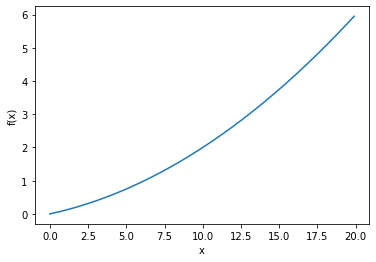

In [22]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [23]:
# 미분값(접선의 기울기) 구하기, 두번째 인자가 x
numerical_diff(function_1, 5)
numerical_diff(function_1, 10)

0.2999999999986347

x = 5 에서의 접선의 기울기는 0.1999999999990898


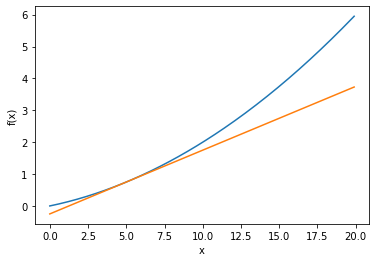

In [24]:
def tangent_line(f, x): # 접선의 기울기
    d = numerical_diff(f, x)
    print("x =", x, "에서의 접선의 기울기는", d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y) # 함수 그래프
plt.plot(x, y2) # 접선
plt.show()

####**편미분**
변수가 여럿인 함수에 대한 미분</br>
어떤 변수에 대해 편미분할 것인지 구별해야한다.

In [25]:
def function_2(x):
  return x[0]**2+x[1]**2

In [26]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0
# x0 = 3, x1 = 4일 때 x0에 대한 편미분
numerical_diff(function_tmp1, 3.0) 

6.00000000000378

In [27]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1
# x0 = 3, x1 = 4일 때 x1에 대한 편미분
numerical_diff(function_tmp2, 4.0)

7.999999999999119

####**기울기**
모든 변수의 편미분을 벡터로 정리하면 기울기가 된다.

In [28]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size): # 변수 개수 만큼
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2)/(2*h) # 하나의 변수에 대해 중앙 차분(미분값) 구하기
    x[idx] = tmp_val

  return grad

In [29]:
print("for x0 = 3, x1 = 4", numerical_gradient(function_2, np.array([3.0, 4.0])))
print("for x0 = 0, x1 = 2", numerical_gradient(function_2, np.array([0.0, 2.0])))
print("for x0 = 3, x1 = 0", numerical_gradient(function_2, np.array([3.0, 0.0])))

for x0 = 3, x1 = 4 [6. 8.]
for x0 = 0, x1 = 2 [0. 4.]
for x0 = 3, x1 = 0 [6. 0.]


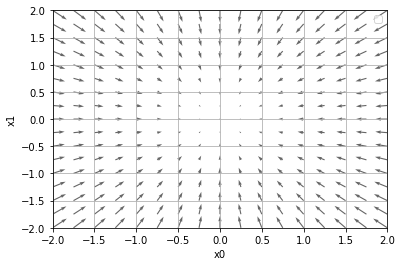

In [30]:
#위에서 구한 기울기의 결과에 마이너스를 붙인 벡터 그리기

from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X): # 경사 구하기
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x): # 접선 구하기
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

가장 낮은 곳(최솟값)으로 화살표(벡터)가 가르키고 있음.</br>기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향이다.

###**경사하강법**
학습 단계에서 최적의 매개변수를 찾을 때 손실 함수가 최솟값이 되도록 한다.</br>
현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고, 이 과정을 반복해 함수의 값을 줄여나가는 방법.</br>
그러나 기울기가 0인 곳을 반드시 최솟값임을 보장할 수 없다.</br>
saddle point(안장점): 보는 방향에 따라 극솟값일수도 극댓값일수도 있는 부분</br>
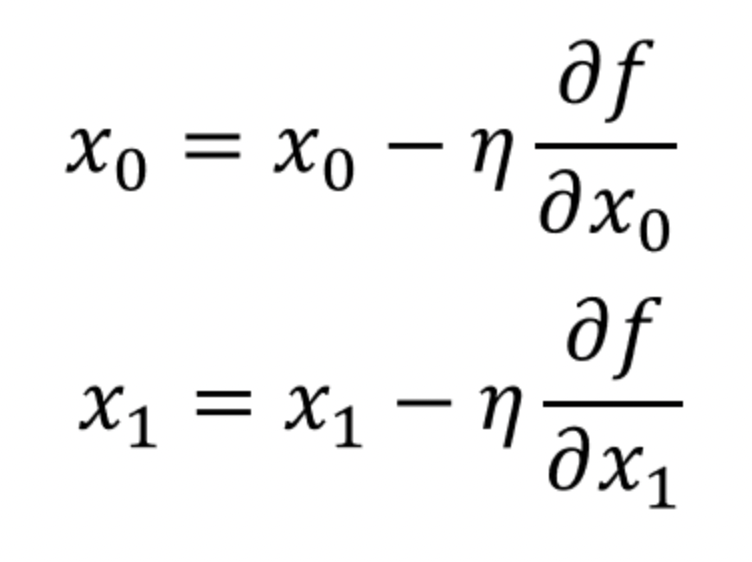

In [31]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100): #f: 함수, init_x: 초깃값(최적화 대상), lr: 학습률, step_num: 반복 횟수

  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr*grad

  return x

In [32]:
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print("before: ", init_x)
print("after: ", gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100))

before:  [-3.  4.]
after:  [-6.11110793e-10  8.14814391e-10]


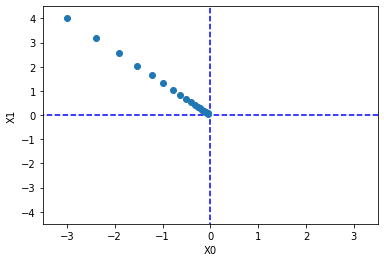

In [33]:
# 그림으로 확인하기
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [34]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
print("too big : ", gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
print("too small : ", gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100))

too big :  (array([-2.58983747e+13, -1.29524862e+12]), array([[-3.00000000e+00,  4.00000000e+00],
       [ 5.70000000e+01, -7.60000000e+01],
       [-1.08300000e+03,  1.44400000e+03],
       [ 2.05770000e+04, -2.74360000e+04],
       [-3.90963008e+05,  5.21284002e+05],
       [ 7.42829664e+06, -9.90439654e+06],
       [-1.41137328e+08,  1.88183103e+08],
       [ 2.68126267e+09, -3.57501690e+09],
       [-5.09763373e+10,  6.79001831e+10],
       [ 9.45170863e+11, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],

학습률이 너무 크면 큰 값으로 발산해버림</br>학습률이 너무 작으면 거의 갱신되지 않은 채 끝남
* 하이퍼파라미터(hyperparameter): 학습률과 같이 사람이 직접 설정해야 하는 매개변수</br>가중치와 편향과 같은 신경망의 매개변수는 훈련 데이터와 학습 알고리즘에 의해 자동으로 획득되는 매개변수임
* 기울기 : 가중치 매개변수에 대한 손실 함수의 기울기

In [35]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [36]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

In [38]:
def numerical_gradient(f, X): # 경사 구하기
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [39]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) # 평균 0, 표준편차 1인 정규분포 난수로 초기화 (2*3 matrix)

  def predict(self, x): # 예측 수행
    return np.dot(x, self.W)

  def loss(self, x, t): # 손실함수, x: 입력 데이터, t: 정답 레이블
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [40]:
net = simpleNet()
print(net.W) # 정규분포 난수로 뽑아낸 2*3 가중치

[[ 0.12367283 -0.08690987  1.06915794]
 [-1.63132499  1.32331411  0.14294092]]


In [41]:
x = np.array([0.6, 0.9]) # 입력 값 (2)
p = net.predict(x) # 입력 값 x(2)와 W(2*3) 내적
print(p)
print(np.argmax(p)) # 내적한 값 중 가장 큰 것의 인덱스 -> 2 (0.218)
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t) # 예측한 것과 정답 사이의 오차 계산

[-1.39398879  1.13883678  0.77014159]
1


0.9402790712608283

In [42]:
def f(W):
  return net.loss(x, t) # f(x)와의 일관성을 위해

print("before ", net.W)
dW = numerical_gradient(f, net.W) # 임의로 뽑아낸 가중치에 대해 경사하강
print("after ", dW)

before  [[ 0.12367283 -0.08690987  1.06915794]
 [-1.63132499  1.32331411  0.14294092]]
after  [[ 0.02691058  0.33877808 -0.36568866]
 [ 0.04036588  0.50816712 -0.548533  ]]


경사하강 함수를 지나고 도출된 결과를 간단하게 해석해보자.</br>2*3 matrix에서 행과 열이 1인 0.215는 곧 h의 0.2배만큼 증가할 것이라는 뜻.</br>행 2, 열 3인 -0.86: h의 0.8배만큼 감소할 것이라는 뜻.</br>손실함수의 행1 열1 (0.2)에 대해서는 음의 방향으로, 행3 열2 (-0.8)에 대해서는 양의 방향으로 갱신해야 함.

In [43]:
# (참고) def f(x) 대신에 사용할 수 있는 새로운 표기
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

###**정리**</br>
전제 : 신경망에는 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습' 이라고 한다.</br>
**(1) 미니배치 처리** : 훈련 데이터 중 일부를 무작위로 가져온다. 미니배치의 손실함수 값을 줄이는 것이 목표.</br>
**(2) 기울기 산출** : 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.</br>기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.</br>**(3) 매개변수 갱신** : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다. (구한 기울기에서 반대 부호)</br>
**(4) 반복**
</br>**--> SGD (확률적 경사 하강법) : 확률적으로 무작위로 골라낸 데이터(미니배치)에 대해 수행하는 경사하강법**

###**2층 신경망 클래스 구현**

**< 변수 , 메소드 정리 >**</br></br>
(1) 변수</br>
params : 매개변수 보관하는 딕셔너리 변수 (가중치와 편향)</br>
grads : 기울기 보관하는 딕셔너리 변수 (가중치와 편향에 대한 각각의 기울기)</br></br>
(2) 메소드</br>
init : 초기화</br>
predict : 예측 수행</br>
loss : 손실함수 값</br>
accuracy : 정확도</br>
numerical_gradient : 가중치 매개변수의 기울기</br>



In [50]:
class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    # input 뉴런 수(28*28 784), hidden layer 뉴런 수, output 뉴런 수(10)
    # 매개변수(가중치와 편향) 랜덤 생성
    self.params = {}
    self.params['W1'] = weight_init_std * \
    np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * \
    np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    # 내적 -> 시그모이드 -> 소프트맥스로 예측
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    # 손실함수 값
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    # 정확도 측정 (가장 확률이 높은 것에 대해 오차 측정)
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    # 경사하강 (loss 이용해서 파라미터 반복 조정)
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [45]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
# params 변수 안에 필요한 매개 변수가 전부 저장됨
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [46]:
# 예측 수행하기
x = np.random.rand(100, 784)
y = net.predict(x)

In [ ]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

In [48]:
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 # 학습률
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)


###**시험 데이터로 평가하기**
위에서 도출한 값은 훈련 데이터의 미니배치에 대한 손실함수</br>
훈련 데이터 외의 데이터를 올바르게 인식하는지도 확인해야 한다.</br>
오버피팅(overfitting): 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다.</br>
오버피팅이 발생하지 않고 범용적인 능력이 있어야 한다.</br>

* 에폭(epoch): 소진 시까지 걸리는 횟수</br>
총 데이터 개수(10000개) = 미니배치 사이즈(100개)*에폭(100회)

In [51]:
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

iters_num = 100
train_size = x_train.shape[0]
batch_size = 100 
learning_rate = 0.1 

### 1에폭 당 정확도를 기록할 리스트, 반복 수
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)
###

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):

  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.numerical_gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  ### 1에폭 당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc |" + str(train_acc) + ", " + str(test_acc))
  ###

train acc, test acc |0.09871666666666666, 0.098


KeyboardInterrupt: ignored